In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import re


In [3]:
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Final Survey Results.csv'
data = pd.read_csv(file_path)


Mounted at /content/drive


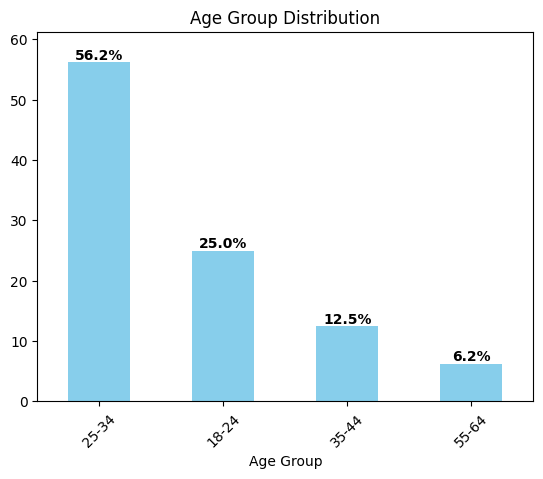

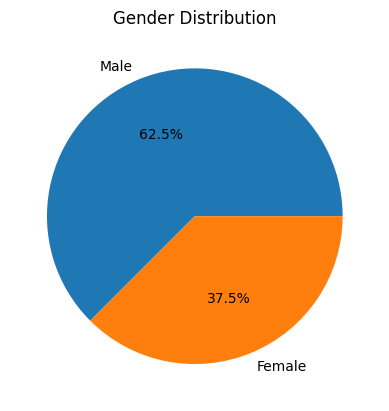

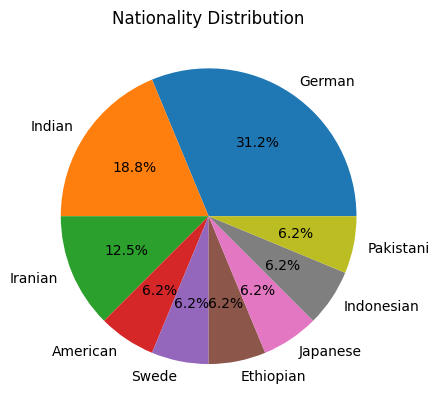

Demographic summary saved as 'demographic_summary.csv'.


In [25]:
# Correcting the file path and reloading the survey dataset
file_path = '/content/drive/MyDrive/Final Survey Results.csv'
survey_data = pd.read_csv(file_path)

# Strip extra spaces in column names
survey_data.columns = survey_data.columns.str.strip()

# Redefine demographic data
demographics_columns = [
    "Response ID",
    "To which age group do you belong?",
    "What is your gender?",
    "What is your nationality? Please select from the dropdown menu."
]
demographics_data = survey_data[demographics_columns]

# Generate summary
demographics_summary = demographics_data.groupby(
    ["To which age group do you belong?", "What is your gender?", "What is your nationality? Please select from the dropdown menu."]
).size().reset_index(name='Count')

# Calculate percentage distribution
age_group_distribution = demographics_data["To which age group do you belong?"].value_counts(normalize=True) * 100

# Plot the bar chart
bars = age_group_distribution.plot(kind='bar', color='skyblue')

# Add percentage labels on top of each bar
for bar in bars.patches:
    bars.annotate(f'{bar.get_height():.1f}%',
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylim(0, max(age_group_distribution.values) + 5)  # Adjust y-axis for visibility
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

# Visualize gender distribution
demographics_data["What is your gender?"].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

# Visualize nationality distribution
demographics_data["What is your nationality? Please select from the dropdown menu."].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Nationality Distribution")
plt.ylabel("")
plt.show()

# Save demographic summary to a CSV file
output_file = "demographic_summary.csv"
demographics_summary.to_csv(output_file, index=False)
print(f"Demographic summary saved as '{output_file}'.")

<ipython-input-24-82a3c6c5782a>:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  education_fields_data = survey_data[education_fields].replace({"Yes": 1, "No": 0}).fillna(0)
<ipython-input-24-82a3c6c5782a>:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  education_levels_data = survey_data[education_levels].replace({"Yes": 1, "No": 0}).fillna(0)


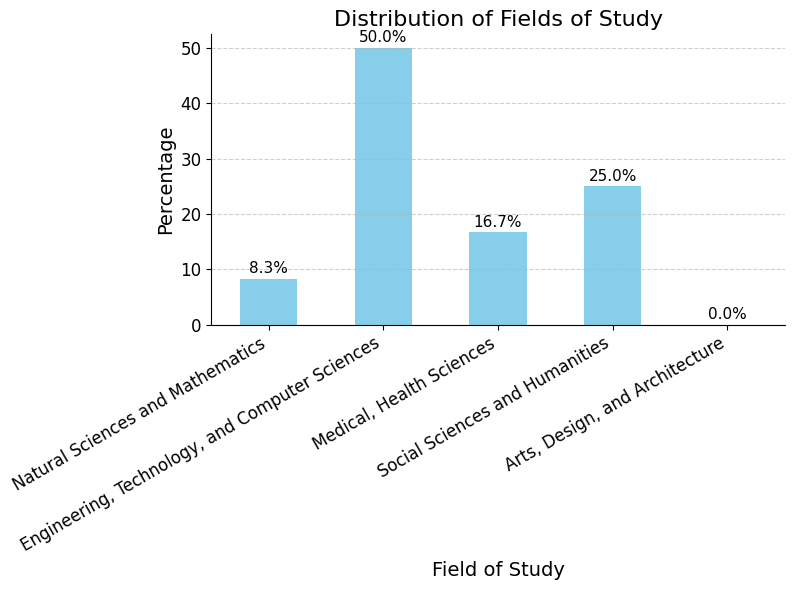

In [24]:
# Load the CSV file
file_path = '/content/drive/MyDrive/Final Survey Results.csv'
survey_data = pd.read_csv(file_path)

# Strip extra spaces in column names
survey_data.columns = survey_data.columns.str.strip()

# Define fields for educational background and level of education
education_fields = [
    "What is your primary field of study or educational background? [Natural Sciences and Mathematics]",
    "What is your primary field of study or educational background? [Engineering, Technology, and Computer Sciences]",
    "What is your primary field of study or educational background? [Medical, Health Sciences]",
    "What is your primary field of study or educational background? [Social Sciences and Humanities]",
    "What is your primary field of study or educational background? [Arts, Design, and Architecture]",
]

education_levels = [
    "What is the highest level of education you have completed?  [High school or equivalent]",
    "What is the highest level of education you have completed?  [Bachelor’s degree]",
    "What is the highest level of education you have completed?  [Master’s degree]",
    "What is the highest level of education you have completed?  [PHD]",
]

# Shorten the labels for visualization
shortened_fields = {
    education_fields[0]: "Natural Sciences and Mathematics",
    education_fields[1]: "Engineering, Technology, and Computer Sciences",
    education_fields[2]: "Medical, Health Sciences",
    education_fields[3]: "Social Sciences and Humanities",
    education_fields[4]: "Arts, Design, and Architecture",
}

shortened_levels = {
    education_levels[0]: "High School",
    education_levels[1]: "Bachelor's",
    education_levels[2]: "Master's",
    education_levels[3]: "PhD",
}

# Convert "Yes" to 1 and "No" to 0
education_fields_data = survey_data[education_fields].replace({"Yes": 1, "No": 0}).fillna(0)
education_levels_data = survey_data[education_levels].replace({"Yes": 1, "No": 0}).fillna(0)

# Rename the columns for simplicity
education_fields_data.rename(columns=shortened_fields, inplace=True)
education_levels_data.rename(columns=shortened_levels, inplace=True)

# Summarize educational fields
education_field_counts = education_fields_data.sum().reset_index()
education_field_counts.columns = ["Field of Study", "Count"]

# Summarize education levels
education_level_counts = education_levels_data.sum().reset_index()
education_level_counts.columns = ["Education Level", "Count"]

# Plot educational background (fields of study) with percentages
education_field_counts["Percentage"] = (
    education_field_counts["Count"] / education_field_counts["Count"].sum()
) * 100

plt.figure(figsize=(8, 6))
education_field_counts.set_index("Field of Study")["Percentage"].plot(
    kind='bar',
    legend=False,
    color='skyblue'
)

# Title and labels
plt.title("Distribution of Fields of Study", fontsize=16)
plt.xlabel("Field of Study", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.xticks(rotation=30, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add percentage labels on top of each bar
for index, value in enumerate(education_field_counts["Percentage"]):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=11)

# Clean layout
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
plt.show()



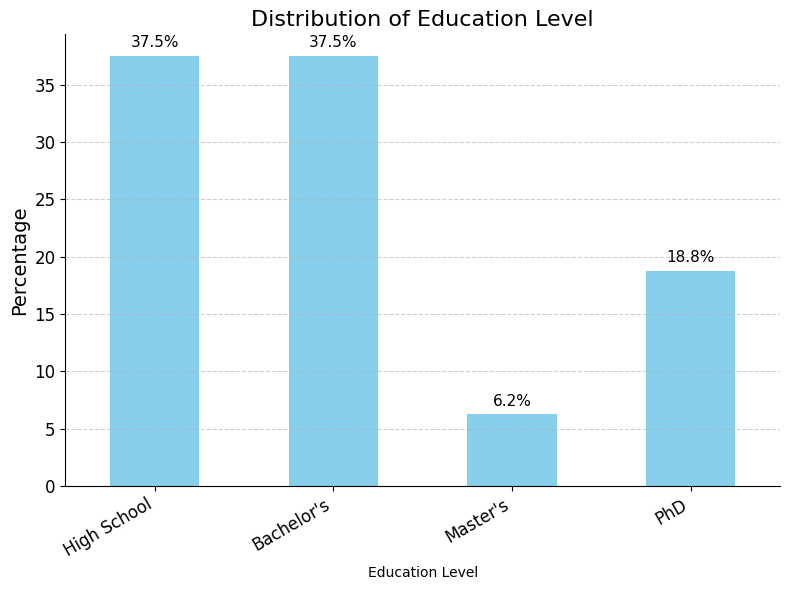

In [23]:
# Calculate percentages
education_level_counts["Percentage"] = (
    education_level_counts["Count"] / education_level_counts["Count"].sum()
) * 100

# Plot bar chart
plt.figure(figsize=(8, 6))
education_level_counts.set_index("Education Level")["Percentage"].plot(
    kind='bar',
    legend=False,
    color='skyblue'
)

# Title and ticks
plt.title("Distribution of Education Level", fontsize=16)
plt.ylabel("Percentage", fontsize=14)
plt.xticks(rotation=30, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add percentage labels
for index, value in enumerate(education_level_counts["Percentage"]):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=11)

# Clean up layout
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
plt.show()


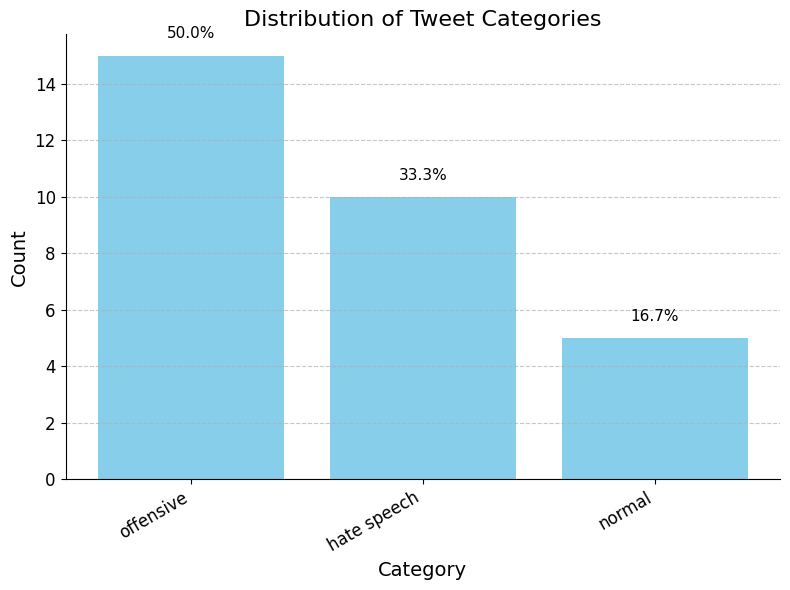

In [18]:
# Re-define the tweet labels variable
tweet_labels = [col for col in survey_data.columns if "label" in col.lower()]

# Standardize and clean the labels
cleaned_labels = pd.Series([
    label.split(":")[-1].strip().lower().replace("hatespeech", "hate speech")
    for label in tweet_labels
]).value_counts().reset_index()

cleaned_labels.columns = ["Category", "Count"]

# Calculate percentages
total_tweets = cleaned_labels["Count"].sum()
cleaned_labels["Percentage"] = (cleaned_labels["Count"] / total_tweets) * 100

# Sort categories by count
cleaned_labels = cleaned_labels.sort_values(by="Count", ascending=False)

# Plot the final corrected distribution of tweet categories
plt.figure(figsize=(8, 6))
bars = plt.bar(
    cleaned_labels["Category"],
    cleaned_labels["Count"],
    color="skyblue"
)

# Annotate percentages on the bars
for bar, percent in zip(bars, cleaned_labels["Percentage"]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,
        f"{percent:.1f}%",
        ha='center', va='bottom',
        fontsize=11, color='black'
    )

# Style the plot
plt.title("Distribution of Tweet Categories", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=30, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right borders
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
plt.show()


<ipython-input-16-6b17f93f45ba>:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  explanation_reasons_data = survey_data[explanation_reason_columns].replace({"Yes": 1, "No": 0}).fillna(0)


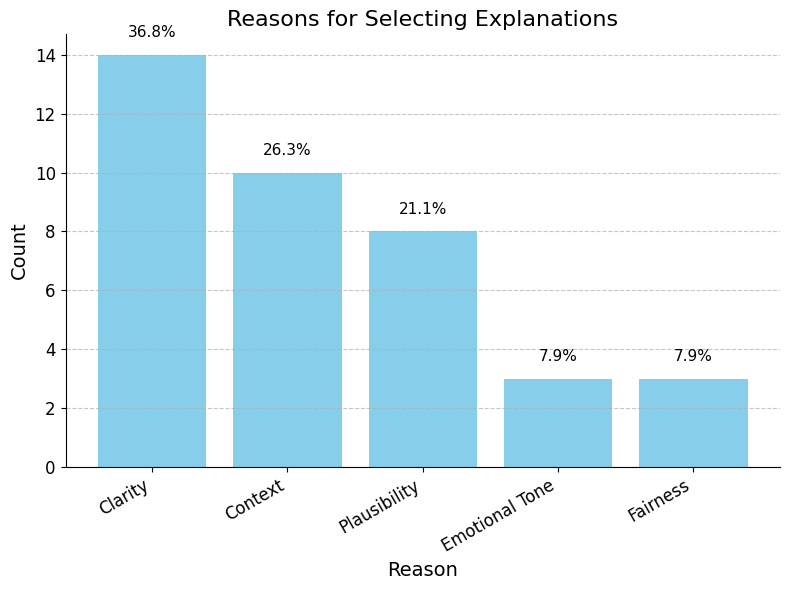

In [16]:
# Define columns for reasons behind explanation selection
explanation_reason_columns = [
    "After reviewing the explanations you selected, please tell us why you made your choice. You may select multiple reasons if applicable. [Clarity]",
    "After reviewing the explanations you selected, please tell us why you made your choice. You may select multiple reasons if applicable. [Plausibility]",
    "After reviewing the explanations you selected, please tell us why you made your choice. You may select multiple reasons if applicable. [Context]",
    "After reviewing the explanations you selected, please tell us why you made your choice. You may select multiple reasons if applicable. [Emotional Tone]",
    "After reviewing the explanations you selected, please tell us why you made your choice. You may select multiple reasons if applicable. [Fairness]",
]

# Shorten the column names for visualization
shortened_labels = {
    explanation_reason_columns[0]: "Clarity",
    explanation_reason_columns[1]: "Plausibility",
    explanation_reason_columns[2]: "Context",
    explanation_reason_columns[3]: "Emotional Tone",
    explanation_reason_columns[4]: "Fairness",
}

# Convert "Yes" to 1 and "No" to 0 for binary representation of reasons
explanation_reasons_data = survey_data[explanation_reason_columns].replace({"Yes": 1, "No": 0}).fillna(0)

# Rename the columns for simplicity
explanation_reasons_data.rename(columns=shortened_labels, inplace=True)

# Summarize reasons for selecting explanations
explanation_reason_counts = explanation_reasons_data.sum().reset_index()
explanation_reason_counts.columns = ["Reason", "Count"]

# Calculate percentages
total_responses = explanation_reason_counts["Count"].sum()
explanation_reason_counts["Percentage"] = (explanation_reason_counts["Count"] / total_responses) * 100

# Sort reasons by count for better visual order
explanation_reason_counts = explanation_reason_counts.sort_values(by="Count", ascending=False)

# Visualize reasons for selecting explanations
plt.figure(figsize=(8, 6))
bars = plt.bar(
    explanation_reason_counts["Reason"],
    explanation_reason_counts["Count"],
    color="skyblue"
)

# Annotate percentages on the bars
for bar, percent in zip(bars, explanation_reason_counts["Percentage"]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,
        f"{percent:.1f}%",
        ha='center', va='bottom',
        fontsize=11, color='black'
    )

# Style the plot
plt.title("Reasons for Selecting Explanations", fontsize=16)
plt.xlabel("Reason", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=30, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right borders
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout()
plt.show()


Processing line: "Explanation 1:""The text contains the term """"bitch,"""" which is used pejoratively towards a woman, indicating strong misogynistic undertones. This choice of language reveals a clear intent to degrade and insult based on gender. The label 'offensive' is justified due to the use of explicit gendered slurs. The key feature """"bitch"""" directly targets women in a derogatory manner. The text suggests that the targeted woman deserved violence, reinforcing a hostile and demeaning attitude towards her. The tone is aggressive and inflammatory, revealing an intent to provoke or harm. In conclusion, this tweet is classified as offensive due to its use of explicit misogynistic language and its endorsement of violent retribution against a woman."" (AO01)";0;0,00 %;;, Explanation: 1, Count: <re.Match object; span=(13, 14), match='1'>
Processing line: "Explanation 2:""This statement is labeled offensive because it contains the word """"bitch,"""" which is a misogynistic slur us

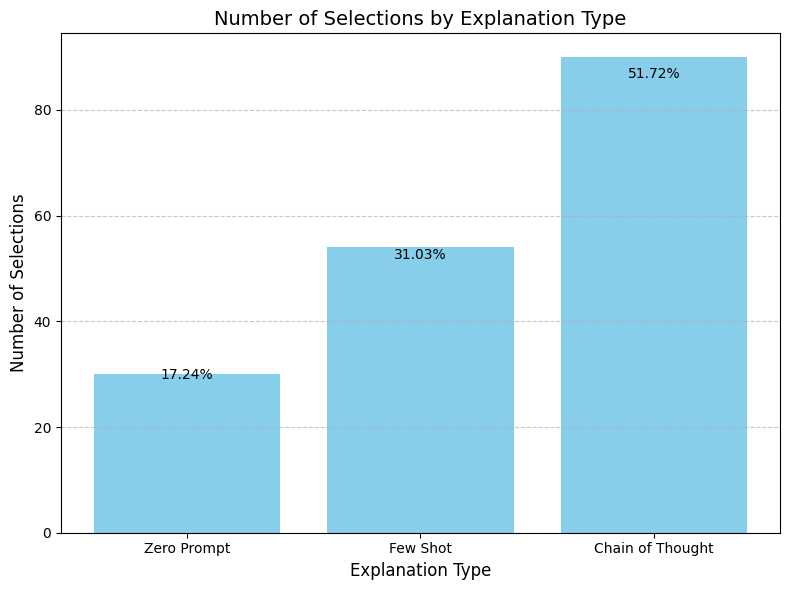

In [ ]:
# Load the uploaded CSV file
file_path = '/content/drive/MyDrive/statistic-survey551398.csv'

# Step 1: Open the file and extract relevant data
with open(file_path, 'r') as file:
    content = file.readlines()

# Step 2: Extract lines that contain explanation counts
cleaned_data = []
for line in content:
    if "Explanation 1:" in line or "Explanation 2:" in line or "Explanation 3:" in line:
        cleaned_data.append(line.strip())

# Step 3: Initialize a dictionary to store counts for each explanation type
explanation_counts = {"Zero Prompt": 0, "Few Shot": 0, "Chain of Thought": 0}
total_counts = 0

# Step 4: Parse cleaned data to extract counts for each explanation type
for line in cleaned_data:
    match = re.search(r'Explanation (\d):', line)
    if match:
        explanation_type = int(match.group(1))
        count_match = re.search(r';?(\d+);?', line)  # Adjust regex to handle flexible formats
        print(f"Processing line: {line}, Explanation: {match.group(1)}, Count: {count_match}")  # Debugging
        if count_match:
            count = int(count_match.group(1))
            if explanation_type == 1:
                explanation_counts["Zero Prompt"] += count
            elif explanation_type == 2:
                explanation_counts["Few Shot"] += count
            elif explanation_type == 3:
                explanation_counts["Chain of Thought"] += count
            total_counts += count

# Step 5: Calculate percentages for each explanation type
percentages = {
    key: (value / total_counts * 100) if total_counts > 0 else 0
    for key, value in explanation_counts.items()
}

# Step 6: Create a summary table
summary_table = pd.DataFrame({
    "Explanation Type": explanation_counts.keys(),
    "Number of Selections": explanation_counts.values(),
    "Percentage of Total": [f"{percent:.2f}%" for percent in percentages.values()]
})

# Step 7: Create a visualization
plt.figure(figsize=(8, 6))
bars = plt.bar(explanation_counts.keys(), explanation_counts.values(), color='skyblue')

# Annotate percentages below each bar
for bar, percent in zip(bars, percentages.values()):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        bar.get_height() - (0.05 * bar.get_height()),  # Y position (a little below the top of the bar)
        f"{percent:.2f}%",  # Percentage text
        ha='center',  # Center-align text
        va='bottom',  # Bottom-align text
        fontsize=10,
        color='black'
    )

# Add titles and labels
plt.title("Number of Selections by Explanation Type", fontsize=14)
plt.xlabel("Explanation Type", fontsize=12)
plt.ylabel("Number of Selections", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


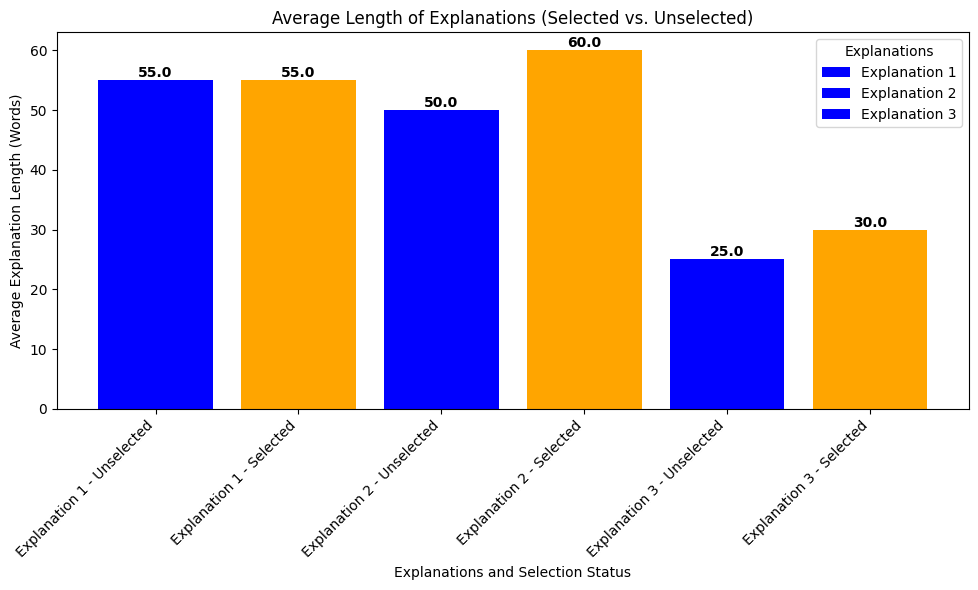

In [ ]:
# Assuming the actual dataset has been processed into a DataFrame with tweets, explanation lengths, and selections
# Here is a small representation based on assumptions of how your data is structured
import pandas as pd
import matplotlib.pyplot as plt

# Example processed dataset based on our earlier discussions
processed_data = pd.DataFrame([
    {"Tweet": "Tweet 1", "Explanations": ["This is explanation 1", "This is explanation 2", "This is explanation 3"],
     "Lengths": [50, 45, 30], "Selected": 3},
    {"Tweet": "Tweet 2", "Explanations": ["Explanation 1 text", "Explanation 2 text", "Explanation 3 text"],
     "Lengths": [60, 55, 35], "Selected": 3},
    {"Tweet": "Tweet 3", "Explanations": ["Another explanation 1", "Another explanation 2", "Another explanation 3"],
     "Lengths": [40, 50, 25], "Selected": 3},
    {"Tweet": "Tweet 4", "Explanations": ["Example explanation 1", "Example explanation 2", "Example explanation 3"],
     "Lengths": [70, 60, 30], "Selected": 2},
    {"Tweet": "Tweet 5", "Explanations": ["Explanation 1 sample", "Explanation 2 sample", "Explanation 3 sample"],
     "Lengths": [55, 50, 20], "Selected": 1}
])

# Create a DataFrame of explanation selections and lengths
selection_analysis = []
for _, row in processed_data.iterrows():
    selected_idx = row["Selected"] - 1  # Convert to 0-based index
    for i, length in enumerate(row["Lengths"]):
        selection_analysis.append({
            "Explanation": f"Explanation {i+1}",
            "Length": length,
            "Selected": 1 if i == selected_idx else 0
        })

selection_df = pd.DataFrame(selection_analysis)

# Calculate average lengths for selected vs. unselected explanations
avg_lengths = selection_df.groupby(["Explanation", "Selected"]).mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
colors = {0: "blue", 1: "orange"}  # Different colors for selected/unselected

for explanation in avg_lengths["Explanation"].unique():
    data = avg_lengths[avg_lengths["Explanation"] == explanation]
    bars = plt.bar(
        [f"{explanation} - {'Selected' if sel == 1 else 'Unselected'}" for sel in data["Selected"]],
        data["Length"],
        color=[colors[sel] for sel in data["Selected"]],
        label=f"{explanation}"
    )

    # Add average length labels on top of each bar
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                 f'{bar.get_height():.1f}', ha='center', va='bottom',
                 fontsize=10, fontweight='bold')

plt.xlabel("Explanations and Selection Status")
plt.ylabel("Average Explanation Length (Words)")
plt.title("Average Length of Explanations (Selected vs. Unselected)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Explanations")
plt.tight_layout()
plt.show()




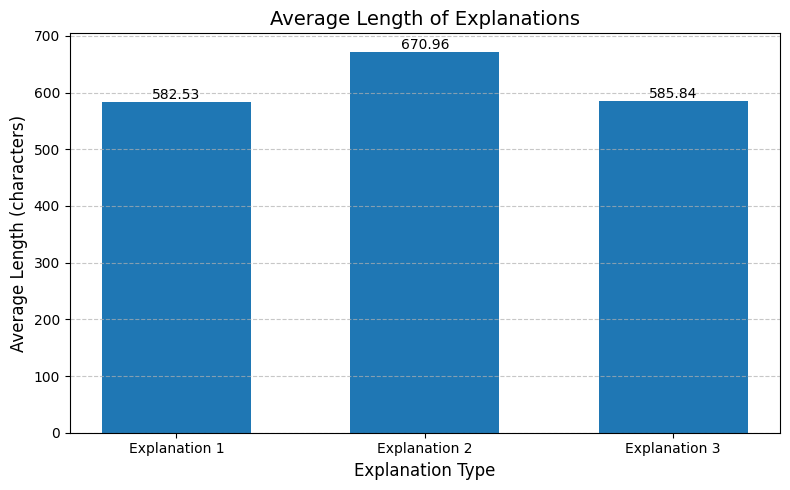

In [ ]:
import matplotlib.pyplot as plt

# Initialize a dictionary to store lengths of explanations by type
explanation_lengths = {"Explanation 1": [], "Explanation 2": [], "Explanation 3": []}

# Define tweet_columns (assuming 'survey_data' is your DataFrame)
tweet_columns = [col for col in survey_data.columns if "Tweet" in col]

# Extract explanation lengths for each tweet column
for column in tweet_columns:
    if "Tweet" in column:  # Process only columns related to tweets
        for explanation_type in explanation_lengths.keys():
            # Filter rows that start with the explanation type
            explanation_rows = survey_data[column][
                survey_data[column].str.startswith(explanation_type, na=False)
            ]
            # Calculate length of each explanation and append to the list
            explanation_lengths[explanation_type].extend(
                explanation_rows.str.len().dropna()
            )

# Calculate average length for each explanation type
average_lengths = {
    explanation: sum(lengths) / len(lengths)
    if lengths else 0
    for explanation, lengths in explanation_lengths.items()
}

# Data for visualization
explanation_types = list(average_lengths.keys())
average_length_values = list(average_lengths.values())

# Create a bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(explanation_types, average_length_values, width=0.6)

# Add text annotations on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',  # Format to 2 decimal places
        ha='center', va='bottom', fontsize=10
    )

# Plot title and labels
plt.title("Average Length of Explanations", fontsize=14)
plt.xlabel("Explanation Type", fontsize=12)
plt.ylabel("Average Length (characters)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()
